# Image classification

In [1]:
!pip install torch==1.11.*
!pip install torchvision==0.12.*
!pip install fairscale==0.4.*
!pip install einops==0.4.*
!pip install tokenizers==0.12.*
!pip install jsonargparse==4.7.1
!pip install pytorch-lightning==1.6.2

     |████████████████████████████████| 248 kB 3.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for fairscale: filename=fairscale-0.4.6-py3-none-any.whl size=307252 sha256=2f768523268a2ffc4e719ddd7302bda88260fdb85160512efbb43f426cc1f572
  Stored in directory: /root/.cache/pip/wheels/4e/4f/0b/94c29ea06dfad93260cb0377855f87b7b863312317a7f69fe7
Successfully built fairscale
     |████████████████████████████████| 6.6 MB 4.2 MB/s 
     |████████████████████████████████| 135 kB 4.2 MB/s 
     |████████████████████████████████| 582 kB 4.0 MB/s 
     |████████████████████████████████| 596 kB 45.0 MB/s 
     |████████████████████████████████| 409 kB 44.0 MB/s 
     |████████████████████████████████| 136 kB 55.9 MB/s 
     |████████████████████████████████| 1.1 MB 44.4 MB/s 
     |████████████████████████████████| 271 kB 52.8 MB/s 
     |██████████████

In [2]:
!git clone https://github.com/krasserm/perceiver-io.git

Cloning into 'perceiver-io'...
remote: Enumerating objects: 550, done.
remote: Counting objects: 100% (241/241), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 550 (delta 147), reused 154 (delta 107), pack-reused 309
Receiving objects: 100% (550/550), 951.25 KiB | 1.84 MiB/s, done.
Resolving deltas: 100% (310/310), done.


In [3]:
# Download model checkpoints
!wget -nc -O logs.zip https://martin-krasser.com/perceiver/logs-update-3.zip
!unzip -qo logs.zip

--2022-05-09 13:46:25--  https://martin-krasser.com/perceiver/logs-update-3.zip
Resolving martin-krasser.com (martin-krasser.com)... 217.160.0.142, 2001:8d8:100f:f000::209
Connecting to martin-krasser.com (martin-krasser.com)|217.160.0.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44295508 (42M) [application/zip]
Saving to: ‘logs.zip’

logs.zip            100%[===================>]  42.24M  11.5MB/s    in 5.3s    

2022-05-09 13:46:31 (7.94 MB/s) - ‘logs.zip’ saved [44295508/44295508]



In [4]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("perceiver-io")

from torchvision.datasets import MNIST
from perceiver.data.mnist_preproc import MnistPreprocessor
from perceiver.model.lightning import LitImageClassifier

In [5]:
mnist = MNIST(root='.cache', download=True, train=False)
mnist_preproc = MnistPreprocessor()

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting .cache/MNIST/raw/train-images-idx3-ubyte.gz to .cache/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting .cache/MNIST/raw/train-labels-idx1-ubyte.gz to .cache/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting .cache/MNIST/raw/t10k-images-idx3-ubyte.gz to .cache/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting .cache/MNIST/raw/t10k-labels-idx1-ubyte.gz to .cache/MNIST/raw



In [6]:
ckpt_path = 'logs/img_clf/version_0/checkpoints/epoch=018-val_loss=0.092.ckpt'

model = LitImageClassifier.load_from_checkpoint(ckpt_path).model
model.eval();

/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [7]:
cols, rows = 3, 3
imgs = [mnist[i][0] for i in range(cols * rows)]

In [8]:
with torch.no_grad():
    logits = model(mnist_preproc.preprocess_batch(imgs))
    preds = logits.argmax(dim=1)

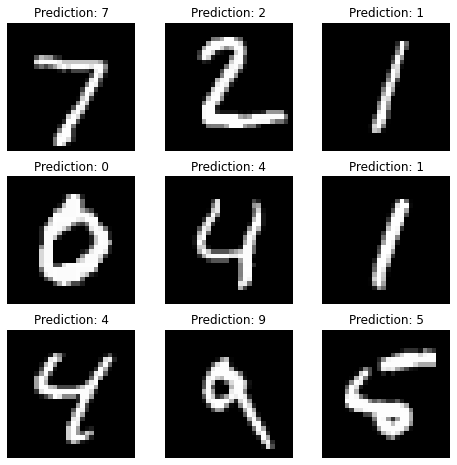

In [9]:
plt.figure(figsize=(8, 8))
for i, (img, pred) in enumerate(zip(imgs, preds)):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.title(f'Prediction: {pred}')
    plt.imshow(np.array(img), cmap='gray')